In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv", low_memory=False, parse_dates=["Date"])
df.head(1000)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
995,996,5,2015-07-31,9288,830,1,1,0,1
996,997,5,2015-07-31,6713,476,1,1,0,1
997,998,5,2015-07-31,6533,651,1,1,0,1
998,999,5,2015-07-31,11274,749,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [25]:
dfg = df.groupby("Store")
dfg


In [5]:
#mean aggregation of the df grouped by store
#use reset index to add the storec column back
store_avg = dfg.mean()
store_avg.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [6]:
store_avg = store_avg.reset_index()

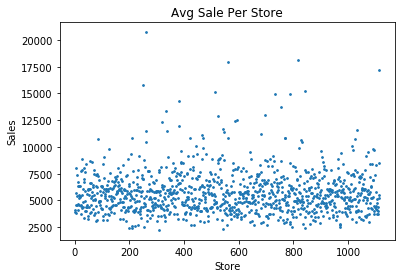

In [7]:
store_avg.plot.scatter("Store", "Sales", s=3, title="Avg Sale Per Store");

### Multiple Groups

In [8]:
# grouped by store and day of  week.  as_index=False preserves the 
# Store id column
store_day = df.groupby(["Store", "DayOfWeek"], as_index=False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


In [9]:
type(store_day)

pandas.core.frame.DataFrame

In [10]:
#group by store and day of week
store_day = df.groupby(["Store", "DayOfWeek"], as_index=False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


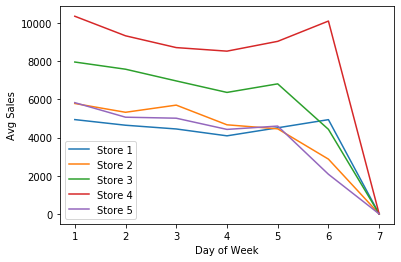

In [11]:
#discrete group by
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label=f"Store {store}")
    plt.xlabel("Day of Week")
    plt.ylabel("Avg Sales")
    plt.legend()

In [12]:
### Continuous Grouping
df.groupby("Sales").mean().shape #shows discrete values..not what we want

(21734, 6)

In [13]:
df.Sales.describe() #identify the bins

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [14]:
#create bins from data shape then use cuts function to create a 
#column of buckets then add this back to the df
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000] 
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df["SalesGroup"] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [15]:
sales_salesgroup = df.groupby(["Sales", "SalesGroup"], as_index=False).mean()
sales_salesgroup.tail(200)

,Sales,SalesGroup,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday
130204,33357,"(8000.0, 10000.0]",NaN,NaN,NaN,NaN,NaN,NaN
130205,33357,"(10000.0, 50000.0]",262.0,7.0,5024.0,1.0,0.0,0.0
130206,33655,"(-0.001, 2000.0]",NaN,NaN,NaN,NaN,NaN,NaN
130207,33655,"(2000.0, 4000.0]",NaN,NaN,NaN,NaN,NaN,NaN
130208,33655,"(4000.0, 6000.0]",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
130399,41551,"(2000.0, 4000.0]",NaN,NaN,NaN,NaN,NaN,NaN
130400,41551,"(4000.0, 6000.0]",NaN,NaN,NaN,NaN,NaN,NaN
130401,41551,"(6000.0, 8000.0]",NaN,NaN,NaN,NaN,NaN,NaN
130402,41551,"(8000.0, 10000.0]",NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [17]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [18]:
df.groupby(["Store", "SalesGroup", "DayOfWeek"]).Sales.count()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64

## Intelligent Imputation

In [27]:
dfo=pd.read_csv("train.csv", low_memory=False, parse_dates=["Date"])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


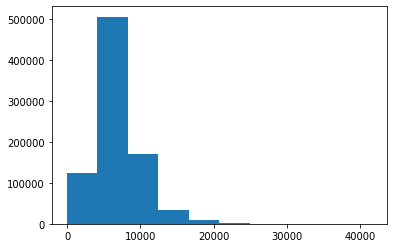

In [33]:
#remove any non-open stores
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales);

In [34]:
df.shape

(844392, 9)

In [35]:
dfo.shape

(1017209, 9)

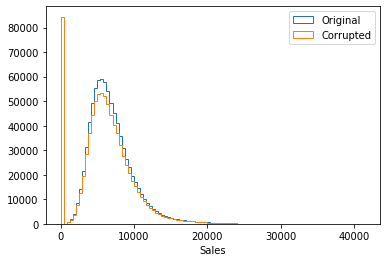

In [44]:
# intentionally corrupt the data

# create a mask that randomly identifies 1
# in 10 examples to screw up
mask = np.random.choice(10, size=df.shape[0]) == 0
#create a copy of the Sales column
df["NewSales"] = df.Sales.copy()
#apply mask to change values to NaN
df.loc[mask, "NewSales"] = np.nan


plt.hist(df.Sales, label="Original", histtype="step", bins=100)
#plot corrupted series, replacing all NaN with 0
plt.hist(df.NewSales.fillna(0), label="Corrupted", histtype="step", bins=100
        )
plt.legend(), plt.xlabel("Sales");

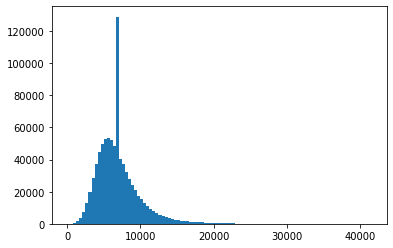

In [49]:

#transform is like apply but needs to return a series
#the same size as the input
# creates a new series where all NaN's are replaced
# with the mean value of the entire series
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins=100);

In [50]:
## use known relationships to group by
# and do smarter imputation
dfg = df.groupby(["Store", "DayOfWeek"])
dfg.median().head()

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5359.0
      2          4640.5      549.5   1.0    1.0            0.0    4678.0
      3          4549.5      533.0   1.0    1.0            0.0    4549.5
      4          4380.0      525.0   1.0    1.0            0.0    4311.0
      5          4651.0      552.0   1.0    1.0            0.0    4653.5

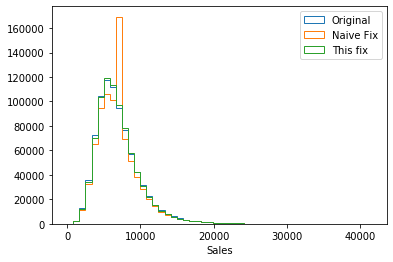

In [51]:


test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

opts = {"histtype":"step", "bins": 50}
plt.hist(df.Sales, label="Original", **opts);
plt.hist(test_fix, label="Naive Fix", **opts);
plt.hist(test_fix2, label="This fix", **opts);
plt.legend(), plt.xlabel("Sales");

## Group aggregation 

### Single Aggregates

In [52]:
df=pd.read_csv("train.csv", low_memory=False, parse_dates=["Date"])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [60]:
#mean, median, max, etc...
# https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html
df.groupby(["Store", "DayOfWeek"]).cumsum().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Sales          1017209 non-null  int64
 1   Customers      1017209 non-null  int64
 2   Open           1017209 non-null  int64
 3   Promo          1017209 non-null  int64
 4   SchoolHoliday  1017209 non-null  int64
dtypes: int64(5)
memory usage: 38.8 MB


### Different Aggregates for different columns

In [65]:
# use the agg function and pass in a dictionary
# Can use arrays to pass multiple agg arguments
df2 = df.groupby(["Store", "DayOfWeek"]).agg({"Sales":["mean","max","min"], "Customers":"count"})
# brute-force a column name change
df2.columns = ["SalesMean", "SalesMax", "SalesMin", "Count"]
df2.head(50)

SalesMean  SalesMax  SalesMin  Count
Store DayOfWeek                                         
1     1           4946.119403      9528         0    134
      2           4650.918519      7959         0    135
      3           4454.474074      7821         0    135
      4           4094.607407      7785         0    135
      5           4516.414815      8414         0    135
      6           4942.970149      8367      3352    134
      7              0.000000         0         0    134
2     1           5790.522388     10682         0    134
      2           5329.429630     10374         0    135
      3           5705.281481     10019         0    135
      4           4673.103704      8559         0    135
      5           4462.051852      7574         0    135
      6           2873.104478      4941      1919    134
      7              0.000000         0         0    134
3     1           7965.029851     15689         0    134
      2           7588.214815     14555         0    135
      3           6973.688889     12564         0    135
      4           6371.244444     11617         0    135
      5           6820.222222     12352         0    135
      6           4434.641791      8215         0    134
      7              0.000000         0         0    134
4     1          10365.686567     17412         0    134
      2           9340.200000     16860         0    135
      3           8721.762963     14743         0    135
      4           8535.222222     17311         0    135
      5           9049.503704     15274         0    135
      6          10113.447761     15018      7118    134
      7              0.000000         0         0    134
5     1           5834.880597     11692         0    134
      2           5071.844444      9413         0    135
      3           5019.044444      9315         0    135
      4           4431.429630      8331         0    135
      5           4606.155556      8129         0    135
      6           2079.104478      3995      1423    134
      7              0.000000         0         0    134
6     1           6349.947761     11139         0    134
      2           5850.392593      9810         0    135
      3           5472.096296      8941         0    135
      4           5159.800000     10228         0    135
      5           5525.718519      9521         0    135
      6           3550.626866      5885      2355    134
      7              0.000000         0         0    134
7     1          10304.932836     18413         0    134
      2           9731.740741     15356         0    135
      3           8264.770370     15155         0    135
      4           8066.866667     14335         0    135
      5           8921.866667     16037         0    135
      6           6166.664179     13089      3774    134
      7              0.000000         0         0    134
8     1           6737.947761     10971         0    134

In [73]:
# Using a custom aggregation lambda
mc_uncert = lambda x: np.std(x)/np.sqrt(x.size)
# alternatively, use tuples to let column names
df2 = df.groupby(["Store", "DayOfWeek"]).agg({
    "Sales":[("SalesMean", "mean"), ("SalesUncert", mc_uncert)], 
    "Customers":"count"
})
df2.head(20)

Sales             Customers
                   SalesMean SalesUncert     count
Store DayOfWeek                                   
1     1          4946.119403  139.120367       134
      2          4650.918519   94.412423       135
      3          4454.474074   97.225056       135
      4          4094.607407  129.367657       135
      5          4516.414815  113.495466       135
      6          4942.970149   73.729167       134
      7             0.000000    0.000000       134
2     1          5790.522388  188.310367       134
      2          5329.429630  134.627632       135
      3          5705.281481  124.084476       135
      4          4673.103704  130.350835       135
      5          4462.051852  107.927885       135
      6          2873.104478   45.284470       134
      7             0.000000    0.000000       134
3     1          7965.029851  269.273335       134
      2          7588.214815  195.890164       135
      3          6973.688889  171.922662       135
      4          6371.244444  200.622920       135
      5          6820.222222  184.770417       135
      6          4434.641791   94.262344       134

In [72]:
# new syntax - preferred for cleaner column layout:

#requires a named function
def  uncert2(x):
    return np.std(x)/np.sqrt(x.size)

dfg = df.groupby(["Store", "DayOfWeek"])
dfg.agg(
    SalesMean=("Sales", "mean"),
    SalesUncert=("Sales", uncert2)
).reset_index().head()

,Store,DayOfWeek,SalesMean,SalesUncert
0,1,1,4946.119403,139.120367
1,1,2,4650.918519,94.412423
2,1,3,4454.474074,97.225056
3,1,4,4094.607407,129.367657
4,1,5,4516.414815,113.495466


In [79]:
### Extra exercises
df = pd.read_csv("vgsales.csv.zip")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [87]:
#which Genre had highest global sales?
dfg = df.groupby(["Genre"])
dfg.agg(
    SalesMax=("Global_Sales", "max")
).head()

,SalesMax
Genre,
Action,21.40
Adventure,11.18
Fighting,13.04
Misc,29.02
Platform,40.24


In [95]:
#what were 10 highest grossing titles in the Action Category?
df[df.Genre=="Action"].sort_values("Global_Sales", ascending=False).head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24


In [101]:
#what is the highest performing game for each platform and year?
dfg = df.groupby(["Platform", "Year"])
dfg.agg(
    SalesMax=("Global_Sales", "max")
).head(50)

SalesMax
Platform Year            
2600     1980.0      4.31
         1981.0      4.50
         1982.0      7.81
         1983.0      1.31
         1984.0      0.27
         1985.0      0.45
         1986.0      0.37
         1987.0      0.65
         1988.0      0.51
         1989.0      0.47
3DO      1994.0      0.02
         1995.0      0.06
3DS      2011.0     12.21
         2012.0      9.82
         2013.0     14.35
         2014.0     11.33
         2015.0      3.26
         2016.0      1.27
DC       1998.0      2.42
         1999.0      1.20
         2000.0      1.81
         2001.0      0.33
         2002.0      0.29
         2007.0      0.02
         2008.0      0.04
DS       1985.0      0.02
         2004.0     10.42
         2005.0     24.76
         2006.0     30.01
         2007.0      9.02
         2008.0      7.84
         2009.0     11.90
         2010.0     15.32
         2011.0      1.60
         2012.0      8.33
         2013.0      0.69
         2014.0      0.02
         2020.0      0.29
GB       1988.0      1.43
         1989.0     30.26
         1990.0      3.41
         1991.0      1.76
         1992.0     11.18
         1994.0      5.19
         1995.0      2.36
         1996.0     31.37
         1997.0      1.48
         1998.0     14.64
         1999.0     23.10
         2000.0      6.39